In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gaussian Mixture Models (GMMs) are a probabilistic approach to clustering that assumes the data is generated from a mixture of several Gaussian distributions with unknown parameters. They are particularly useful for clustering when the clusters are not necessarily spherical and can overlap. Here's a more detailed overview of GMMs in the context of clustering:

Basic Concept:

A GMM represents a composite distribution, where each component is a Gaussian (normal) distribution.

Each cluster corresponds to one of these Gaussian distributions.
Parameters:

The parameters of a GMM are the mean and covariance of each Gaussian distribution, and the mixing coefficients that indicate how much each Gaussian distribution contributes to the overall data distribution.

These parameters are typically estimated using the Expectation-Maximization (EM) algorithm.

Expectation-Maximization (EM) Algorithm:

Expectation Step (E-Step): Calculate the probabilities that each data point belongs to each Gaussian distribution, based on the current parameter estimates.
Maximization Step (M-Step): Update the parameters (means, covariances, and mixing coefficients) to maximize the likelihood of the data given these probabilities.

These steps are iterated until convergence.

Soft Clustering:

Unlike K-means, which assigns each data point to exactly one cluster, GMM provides the probability of each data point belonging to each cluster (soft clustering).

This approach is useful in scenarios where the boundaries between clusters are not well-defined.

Covariance Types:

The choice of covariance type (e.g., spherical, diagonal, full) for each Gaussian component affects the shape and orientation of the clusters.
This choice can be tailored based on the underlying data distribution.

Determining the Number of Components:

The number of Gaussian components (clusters) is a hyperparameter that needs to be determined.

Methods like the Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) can be used to select an appropriate number of components.

Advantages:

Flexibility in the shape and size of clusters.
Probabilistic cluster assignment allows for more nuanced understanding of data.

Limitations:

More computationally intensive than K-means.
The results can be sensitive to the initialization of parameters.
Choosing the correct number of Gaussian components can be challenging.

Applications:

GMMs are used in various fields such as image processing, pattern recognition, bioinformatics, and speech recognition.

In [2]:
import pandas as pd

file = '/content/drive/MyDrive/Data_Mining_CMPE_255/gmm_data.csv'
data = pd.read_csv(file)

data.head()

,Profit Margin,Loss Margin
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


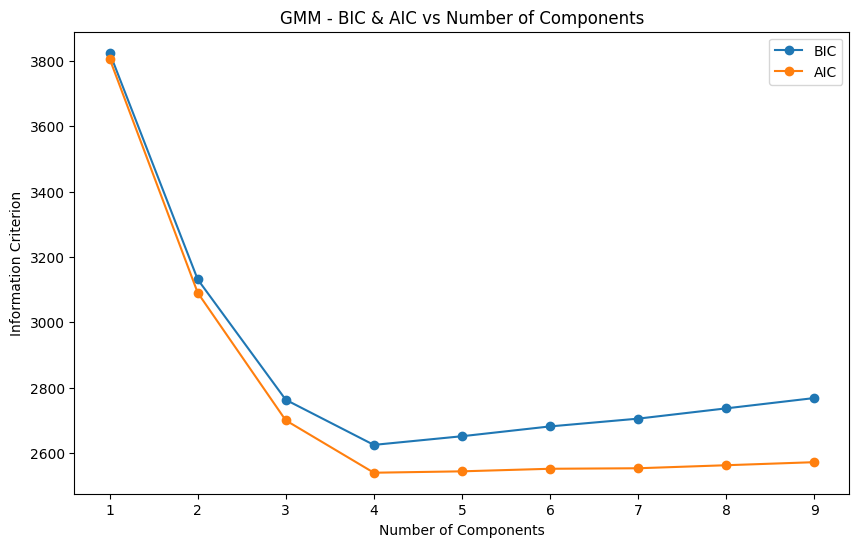

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming your data is already loaded into a DataFrame named 'data'
# If not, you can load it using pd.read_csv('path_to_your_csv_file')

# Determining the range of potential cluster numbers
n_components_range = range(1, 10)  # Adjust the range as needed

# Lists to store BIC and AIC values
bics = []
aics = []

for n_components in n_components_range:
    # Creating a GMM for each number of components
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    bics.append(gmm.bic(data))
    aics.append(gmm.aic(data))

# Plotting the BIC and AIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('GMM - BIC & AIC vs Number of Components')
plt.legend()
plt.show()

4 is clearly the elbow point.

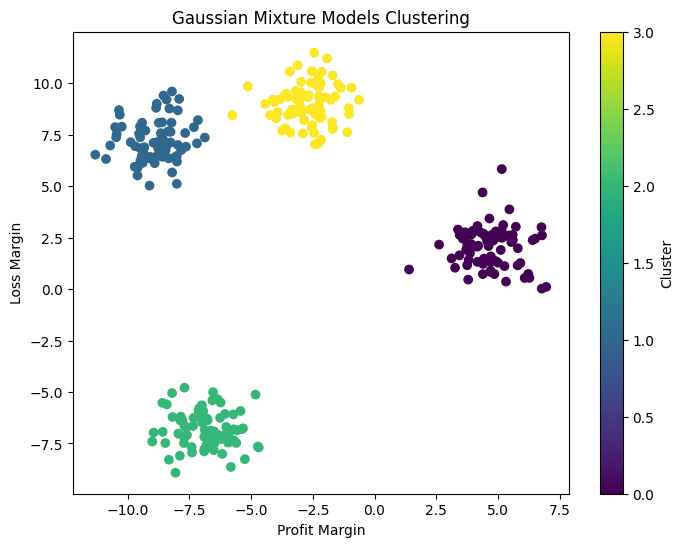

In [9]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Apply GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(data)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=gmm_clusters, cmap='viridis', marker='o')
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('Profit Margin')
plt.ylabel('Loss Margin')
plt.colorbar(label='Cluster')
plt.show()